In [1]:
!git clone https://github.com/EgorDudyrev/OSDA_course
%cd OSDA_course/lazy_fca
import lazy_pipeline as lpipe
     

fatal: destination path 'OSDA_course' already exists and is not an empty directory.
/Users/aldargarmaev/Documents/GitHub/lazyFCA/OSDA_course/lazy_fca


In [2]:
import numpy as np
import pandas as pd 
df = pd.read_csv("/Users/aldargarmaev/Documents/GitHub/lazyFCA/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px

# Adjusting Visual Styles
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.3)

# Ensure visualizations are displayed inline
%matplotlib inline


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Drop columns associated with "worst" attributes
worst_cols = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
              'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 
              'fractal_dimension_worst']
df = df.drop(worst_cols, axis=1)

# Remove columns linked to "perimeter" and "area" attributes
perimeter_area_cols = ['perimeter_mean', 'perimeter_se', 'area_mean', 'area_se']
df = df.drop(perimeter_area_cols, axis=1)

# Eliminate columns related to "concavity" and "concave points" attributes
concavity_cols = ['concavity_mean', 'concavity_se', 'concave points_mean', 'concave points_se']
df = df.drop(concavity_cols, axis=1)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,842302,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
1,842517,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
2,84300903,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
3,84348301,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
4,84358402,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.004239
565,926682,1,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.002498
566,926954,1,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.003892
567,927241,1,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.02324,0.006185


In [7]:
X = df.drop('diagnosis', axis=1)  # Features
y = df['diagnosis']  # Target variable

In [8]:
# Specify the number of bins
X = X.drop('id', axis=1)
num_bins = 3

# Binarize each column
for column in X.columns:
    # Skip the 'id' column if it's not a numerical feature
    if column != 'id':
        # Bin the values into 5 bins
        X[column] = pd.cut(X[column], bins=num_bins, labels=False)

# Display the resulting DataFrame
X

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,1,0,1,2,2,1,1,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0
2,1,1,1,1,1,0,0,0,0,0,0,0
3,0,1,2,2,2,2,0,0,0,1,2,0
4,1,0,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
564,2,1,1,0,1,0,1,0,0,0,0,0
565,1,1,1,0,1,0,0,1,0,0,0,0
566,1,1,0,0,0,0,0,0,0,0,0,0
567,1,1,1,2,2,1,0,0,0,1,0,0


In [9]:
X = pd.get_dummies(X, columns=X.columns)
X

,radius_mean_0,radius_mean_1,radius_mean_2,texture_mean_0,texture_mean_1,texture_mean_2,smoothness_mean_0,smoothness_mean_1,smoothness_mean_2,compactness_mean_0,...,smoothness_se_2,compactness_se_0,compactness_se_1,compactness_se_2,symmetry_se_0,symmetry_se_1,symmetry_se_2,fractal_dimension_se_0,fractal_dimension_se_1,fractal_dimension_se_2
0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
1,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
4,0,1,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,0,1,0,1,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
565,0,1,0,0,1,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
566,0,1,0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
567,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [10]:
X = lpipe.binarize_X(X)
X

,radius_mean_0: 0,radius_mean_0: 1,radius_mean_1: 0,radius_mean_1: 1,radius_mean_2: 0,radius_mean_2: 1,texture_mean_0: 0,texture_mean_0: 1,texture_mean_1: 0,texture_mean_1: 1,...,symmetry_se_1: 0,symmetry_se_1: 1,symmetry_se_2: 0,symmetry_se_2: 1,fractal_dimension_se_0: 0,fractal_dimension_se_0: 1,fractal_dimension_se_1: 0,fractal_dimension_se_1: 1,fractal_dimension_se_2: 0,fractal_dimension_se_2: 1
0,True,False,False,True,True,False,False,True,True,False,...,True,False,True,False,False,True,True,False,True,False
1,True,False,False,True,True,False,False,True,True,False,...,True,False,True,False,False,True,True,False,True,False
2,True,False,False,True,True,False,True,False,False,True,...,True,False,True,False,False,True,True,False,True,False
3,False,True,True,False,True,False,True,False,False,True,...,True,False,False,True,False,True,True,False,True,False
4,True,False,False,True,True,False,False,True,True,False,...,True,False,True,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,True,False,True,False,False,True,True,False,False,True,...,True,False,True,False,False,True,True,False,True,False
565,True,False,False,True,True,False,True,False,False,True,...,True,False,True,False,False,True,True,False,True,False
566,True,False,False,True,True,False,True,False,False,True,...,True,False,True,False,False,True,True,False,True,False
567,True,False,False,True,True,False,True,False,False,True,...,True,False,True,False,False,True,True,False,True,False


In [11]:
X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]
X_bin[0]

{'compactness_mean_0: 0',
 'compactness_mean_1: 0',
 'compactness_mean_2: 1',
 'compactness_se_0: 0',
 'compactness_se_1: 1',
 'compactness_se_2: 0',
 'fractal_dimension_mean_0: 0',
 'fractal_dimension_mean_1: 1',
 'fractal_dimension_mean_2: 0',
 'fractal_dimension_se_0: 1',
 'fractal_dimension_se_1: 0',
 'fractal_dimension_se_2: 0',
 'radius_mean_0: 0',
 'radius_mean_1: 1',
 'radius_mean_2: 0',
 'radius_se_0: 0',
 'radius_se_1: 1',
 'radius_se_2: 0',
 'smoothness_mean_0: 0',
 'smoothness_mean_1: 1',
 'smoothness_mean_2: 0',
 'smoothness_se_0: 1',
 'smoothness_se_1: 0',
 'smoothness_se_2: 0',
 'symmetry_mean_0: 0',
 'symmetry_mean_1: 0',
 'symmetry_mean_2: 1',
 'symmetry_se_0: 1',
 'symmetry_se_1: 0',
 'symmetry_se_2: 0',
 'texture_mean_0: 1',
 'texture_mean_1: 0',
 'texture_mean_2: 0',
 'texture_se_0: 1',
 'texture_se_1: 0',
 'texture_se_2: 0'}

In [12]:
y = y.values.tolist()

In [13]:
n_train = int(len(X)*0.1)
n_test = len(X) - n_train
n_train, n_test

(56, 513)

In [14]:
y_test = y[n_train:]

In [15]:
%time
gen = lpipe.predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, t_preds = lpipe.apply_stopwatch(gen)

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs


Predicting step by step: 100%|██████████| 569/569 [00:23<00:00, 22.03it/s] 


In [16]:
%%time
gen = list(lpipe.predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████| 569/569 [00:00<00:00, 1150.44it/s]

CPU times: user 443 ms, sys: 6.16 ms, total: 449 ms
Wall time: 448 ms


In [17]:
from sklearn.metrics import accuracy_score, f1_score

score_vals = {}
for score_f in [accuracy_score, f1_score]:
    score_name = score_f.__name__
    preds = y_preds
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
    
    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]

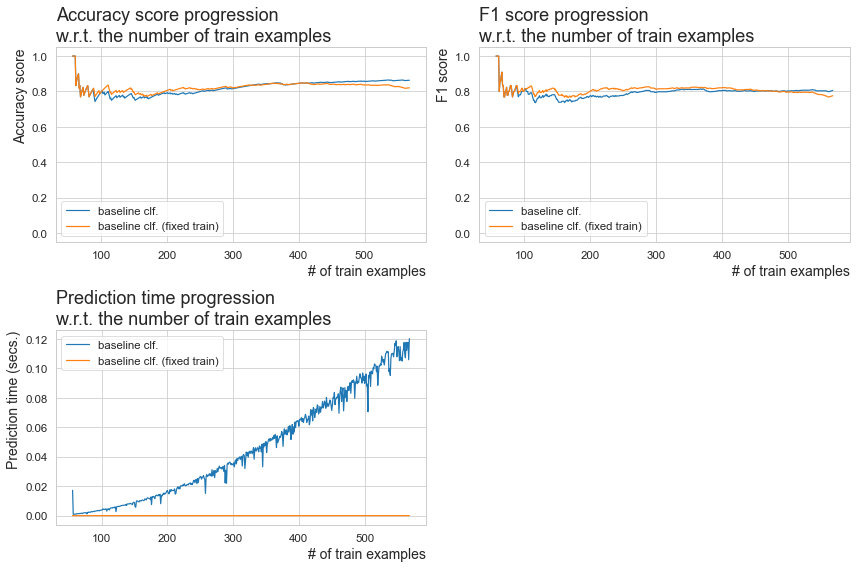

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1)  # Replace default "transparent" background of the figure with the "white" one


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# First two plots are for prediction quality comparison
for ax, t in zip(axs[0],['accuracy_score', 'f1_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')
    
# The third plot is for prediction speed comparison
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

# Add labels and titles to the plots
for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score', 'Prediction time'], ['','','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples', loc='right', size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(), loc='top', size=14)
    ax.legend()
    
# Drop the predefined fourth plot since we do not use it
axs[1,1].set_axis_off()    

# Some postprocessing of plots
plt.tight_layout()
plt.subplots_adjust()

plt.savefig('Classifier_comparison.png')
plt.show()

In [19]:
sum(score_vals['accuracy_score'])/len(score_vals['accuracy_score'])*100

82.26105635376459

In [20]:
sum(score_vals['f1_score'])/len(score_vals['f1_score'])*100

79.47515295827786

In [21]:
n_train = int(len(X)*0.9)
n_test = len(X) - n_train
X_train = X[:n_train]
X_test = X[n_train:]
y_train = y[:n_train]
y_test = y[n_train:]

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
RF=RandomForestClassifier(n_estimators=100)
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)


print(f'Accuracy : {accuracy_score(y_test, y_pred) * 100}')
print(f'F1 : {f1_score(y_test, y_pred) * 100}')

Accuracy :84.21052631578947
F1 :74.2857142857143


In [24]:
from sklearn import tree
DF = tree.DecisionTreeClassifier(max_depth=3,random_state=42)
DF = DF.fit(X_train, y_train)
y_pred = DF.predict(X_test)
print(f'Accuracy : {accuracy_score(y_test, y_pred) * 100}')
print(f'F1 : {f1_score(y_test, y_pred) * 100}')

Accuracy : 87.71929824561403
F1 : 78.78787878787878


In [25]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=5)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(f'Accuracy : {accuracy_score(y_test, y_pred) * 100}')
print(f'F1 : {f1_score(y_test, y_pred) * 100}')

Accuracy : 84.21052631578947
F1 : 74.2857142857143


In [26]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(f'Accuracy : {accuracy_score(y_test, y_pred) * 100}')
print(f'F1 : {f1_score(y_test, y_pred) * 100}')

Accuracy : 82.45614035087719
F1 : 44.44444444444445
